In [5]:
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.compose
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import *
from matplotlib import pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import os

In [37]:
data_frame = pd.read_csv("Automobile_data.csv")
display(data_frame)
data_frame[data_frame["normalized-losses"] == "?"]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
data_frame.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
data_frame.duplicated().sum()

0

In [16]:
#визначаємо нульові значення
data_frame = data_frame.replace("?", np.NaN);
data_frame.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [17]:
data_frame

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [18]:
#Видаляємо відсутні значення
data_frame.dropna(axis=0,inplace=True)
data_frame.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [19]:
data_frame

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [20]:
data_frame = data_frame.apply(pd.to_numeric, errors='ignore')
data_frame.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [21]:
data_frame.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [22]:
transformed_data = data_frame
transformed_data['symboling'] = MinMaxScaler().fit_transform(transformed_data['symboling'].values.reshape((-1, 1)))
transformed_data['make'] = LabelEncoder().fit_transform(transformed_data['make'].values)
transformed_data['fuel-type'] = LabelEncoder().fit_transform(transformed_data['fuel-type'].values)
transformed_data['aspiration'] = LabelEncoder().fit_transform(transformed_data['aspiration'].values)
transformed_data['num-of-doors'] = LabelEncoder().fit_transform(transformed_data['num-of-doors'].values)
transformed_data['body-style'] = LabelEncoder().fit_transform(transformed_data['body-style'].values)
transformed_data['drive-wheels'] = LabelEncoder().fit_transform(transformed_data['drive-wheels'].values)
transformed_data['engine-location'] = LabelEncoder().fit_transform(transformed_data['engine-location'].values)
transformed_data['engine-type'] = LabelEncoder().fit_transform(transformed_data['engine-type'].values)
transformed_data['fuel-system'] = LabelEncoder().fit_transform(transformed_data['fuel-system'].values)
transformed_data['num-of-cylinders'] = LabelEncoder().fit_transform(transformed_data['num-of-cylinders'].values)
transformed_data['price'] = transformed_data['price'].apply(lambda x: float(x))
transformed_data['normalized-losses'] = transformed_data['normalized-losses'].apply(lambda x: float(x))
display(transformed_data)
transformed_data["engine-location"].unique()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.8,164.0,0,1,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.8,164.0,0,1,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0
6,0.6,158.0,0,1,0,0,3,1,0,105.8,...,136,4,3.19,3.40,8.5,110,5500,19,25,17710.0
8,0.6,158.0,0,1,1,0,3,1,0,105.8,...,131,4,3.13,3.40,8.3,140,5500,17,20,23875.0
10,0.8,192.0,1,1,0,1,3,2,0,101.2,...,108,4,3.50,2.80,8.8,101,5800,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.0,17,1,0,0,3,2,0,109.1,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.0,17,1,1,0,3,2,0,109.1,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.0,17,1,0,0,3,2,0,109.1,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95.0,17,0,1,0,3,2,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


array([0])

In [23]:
num_val = transformed_data.select_dtypes(exclude='object')
obj_val = transformed_data.select_dtypes(exclude='int64')
obj_val = transformed_data.select_dtypes(exclude='float64')

varianceThreshold = VarianceThreshold(threshold=(0.5))
varianceThreshold.fit(num_val)
selected_data = varianceThreshold.transform(num_val)
selected_data

array([[1.6400e+02, 0.0000e+00, 3.0000e+00, ..., 2.4000e+01, 3.0000e+01,
        1.3950e+04],
       [1.6400e+02, 0.0000e+00, 3.0000e+00, ..., 1.8000e+01, 2.2000e+01,
        1.7450e+04],
       [1.5800e+02, 0.0000e+00, 3.0000e+00, ..., 1.9000e+01, 2.5000e+01,
        1.7710e+04],
       ...,
       [9.5000e+01, 1.7000e+01, 3.0000e+00, ..., 1.8000e+01, 2.3000e+01,
        2.1485e+04],
       [9.5000e+01, 1.7000e+01, 3.0000e+00, ..., 2.6000e+01, 2.7000e+01,
        2.2470e+04],
       [9.5000e+01, 1.7000e+01, 3.0000e+00, ..., 1.9000e+01, 2.5000e+01,
        2.2625e+04]])

In [24]:
num_val

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.8,164.0,0,1,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.8,164.0,0,1,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0
6,0.6,158.0,0,1,0,0,3,1,0,105.8,...,136,4,3.19,3.40,8.5,110,5500,19,25,17710.0
8,0.6,158.0,0,1,1,0,3,1,0,105.8,...,131,4,3.13,3.40,8.3,140,5500,17,20,23875.0
10,0.8,192.0,1,1,0,1,3,2,0,101.2,...,108,4,3.50,2.80,8.8,101,5800,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,95.0,17,1,0,0,3,2,0,109.1,...,141,4,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0.2,95.0,17,1,1,0,3,2,0,109.1,...,141,4,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0.2,95.0,17,1,0,0,3,2,0,109.1,...,173,4,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0.2,95.0,17,0,1,0,3,2,0,109.1,...,145,2,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
obj_val

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg
3,0,1,0,0,3,1,0,2337,2,2,109,4,102,5500,24,30
4,0,1,0,0,3,0,0,2824,2,1,136,4,115,5500,18,22
6,0,1,0,0,3,1,0,2844,2,1,136,4,110,5500,19,25
8,0,1,1,0,3,1,0,3086,2,1,131,4,140,5500,17,20
10,1,1,0,1,3,2,0,2395,2,2,108,4,101,5800,23,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,17,1,0,0,3,2,0,2952,2,2,141,4,114,5400,23,28
201,17,1,1,0,3,2,0,3049,2,2,141,4,160,5300,19,25
202,17,1,0,0,3,2,0,3012,4,3,173,4,134,5500,18,23
203,17,0,1,0,3,2,0,3217,2,3,145,2,106,4800,26,27


In [26]:
#Найважливіші показники щодо ціни
num_val_drop_price = num_val.drop(["price"], axis=1)
num_val_price = num_val["price"]
varianceThreshold.fit(num_val_drop_price, num_val_price)
selected_data = varianceThreshold.transform(num_val_drop_price)
selected_features = varianceThreshold.get_feature_names_out(
    num_val.columns[:len(num_val.columns)-1])
selected_data = pd.DataFrame(selected_data, columns=selected_features)
display(pd.DataFrame(selected_features))
display(selected_data)

,0
0,normalized-losses
1,make
2,body-style
3,wheel-base
4,length
5,width
6,height
7,curb-weight
8,engine-type
9,engine-size


,normalized-losses,make,body-style,wheel-base,length,width,height,curb-weight,engine-type,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,164.0,0.0,3.0,99.8,176.6,66.2,54.3,2337.0,2.0,109.0,4.0,10.0,102.0,5500.0,24.0,30.0
1,164.0,0.0,3.0,99.4,176.6,66.4,54.3,2824.0,2.0,136.0,4.0,8.0,115.0,5500.0,18.0,22.0
2,158.0,0.0,3.0,105.8,192.7,71.4,55.7,2844.0,2.0,136.0,4.0,8.5,110.0,5500.0,19.0,25.0
3,158.0,0.0,3.0,105.8,192.7,71.4,55.9,3086.0,2.0,131.0,4.0,8.3,140.0,5500.0,17.0,20.0
4,192.0,1.0,3.0,101.2,176.8,64.8,54.3,2395.0,2.0,108.0,4.0,8.8,101.0,5800.0,23.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,95.0,17.0,3.0,109.1,188.8,68.9,55.5,2952.0,2.0,141.0,4.0,9.5,114.0,5400.0,23.0,28.0
155,95.0,17.0,3.0,109.1,188.8,68.8,55.5,3049.0,2.0,141.0,4.0,8.7,160.0,5300.0,19.0,25.0
156,95.0,17.0,3.0,109.1,188.8,68.9,55.5,3012.0,4.0,173.0,4.0,8.8,134.0,5500.0,18.0,23.0
157,95.0,17.0,3.0,109.1,188.8,68.9,55.5,3217.0,2.0,145.0,2.0,23.0,106.0,4800.0,26.0,27.0


In [28]:
columns_array = transformed_data.columns
kbest = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=5)
transformed_data_kbest = kbest.fit_transform(num_val.drop(["price"], axis=1),
                                             num_val["price"])
selected_features = kbest.get_feature_names_out(columns_array[:len(columns_array) - 1])
transformed_data_kbest = pd.DataFrame(transformed_data_kbest, columns=selected_features)
transformed_data_kbest

,normalized-losses,curb-weight,engine-size,horsepower,peak-rpm
0,164.0,2337.0,109.0,102.0,5500.0
1,164.0,2824.0,136.0,115.0,5500.0
2,158.0,2844.0,136.0,110.0,5500.0
3,158.0,3086.0,131.0,140.0,5500.0
4,192.0,2395.0,108.0,101.0,5800.0
...,...,...,...,...,...
154,95.0,2952.0,141.0,114.0,5400.0
155,95.0,3049.0,141.0,160.0,5300.0
156,95.0,3012.0,173.0,134.0,5500.0
157,95.0,3217.0,145.0,106.0,4800.0


In [31]:
tree_classifier = sklearn.ensemble.RandomForestRegressor(n_estimators=50)
tree_classifier.fit(num_val.drop(["price"], axis=1),
                    num_val["price"])
model = sklearn.feature_selection.SelectFromModel(tree_classifier, prefit=True)
forest_selected_data = model.transform(num_val.drop(["price"], axis=1))
forest_selected_data

C:\ProgramData\Miniconda3\envs\dsml\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[  66.2, 2337. ,  109. ],
       [  66.4, 2824. ,  136. ],
       [  71.4, 2844. ,  136. ],
       [  71.4, 3086. ,  131. ],
       [  64.8, 2395. ,  108. ],
       [  64.8, 2395. ,  108. ],
       [  64.8, 2710. ,  164. ],
       [  64.8, 2765. ,  164. ],
       [  60.3, 1488. ,   61. ],
       [  63.6, 1874. ,   90. ],
       [  63.6, 1909. ,   90. ],
       [  63.8, 1876. ,   90. ],
       [  63.8, 1876. ,   90. ],
       [  63.8, 2128. ,   98. ],
       [  63.8, 1967. ,   90. ],
       [  63.8, 1989. ,   90. ],
       [  63.8, 1989. ,   90. ],
       [  64.6, 2535. ,  122. ],
       [  66.3, 2811. ,  156. ],
       [  63.9, 1713. ,   92. ],
       [  63.9, 1819. ,   92. ],
       [  64. , 1837. ,   79. ],
       [  64. , 1940. ,   92. ],
       [  64. , 1956. ,   92. ],
       [  64. , 2010. ,   92. ],
       [  63.9, 2024. ,   92. ],
       [  65.2, 2236. ,  110. ],
       [  65.2, 2289. ,  110. ],
       [  65.2, 2304. ,  110. ],
       [  62.5, 2372. ,  110. ],
       [  

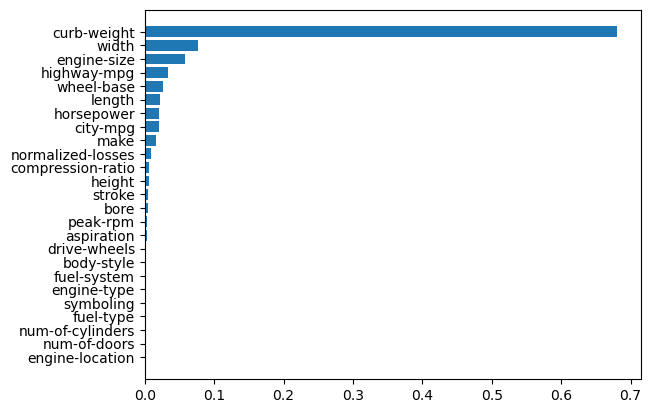

In [33]:
feature_importances = tree_classifier.feature_importances_
indices = np.argsort(feature_importances)
plt.yticks(range(len(indices)), np.array(num_val.drop(["price"], axis=1).columns)[indices])
plt.barh(range(len(indices)), feature_importances[indices])
plt.show()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.518344,-0.124615,0.163505,-0.124897,0.624407,-0.518187,-0.128964,NaN,-0.520591,...,-0.109453,0.035873,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalized-losses,0.518344,1.000000,-0.288406,0.110178,-0.009222,0.393539,-0.309172,0.345933,NaN,-0.060086,...,0.207820,0.266669,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
make,-0.124615,-0.288406,1.000000,-0.109421,0.050310,-0.132092,0.073506,0.134844,NaN,0.170514,...,0.054782,0.274087,0.351522,-0.282026,0.131311,0.078018,-0.282198,-0.079946,-0.083726,-0.021505
fuel-type,0.163505,0.110178,-0.109421,1.000000,-0.427093,0.133281,-0.090209,-0.178731,NaN,-0.339752,...,-0.190333,0.076754,-0.061210,-0.270438,-0.987713,0.100161,0.447561,-0.205928,-0.149619,-0.261305
aspiration,-0.124897,-0.009222,0.050310,-0.427093,1.000000,-0.097959,0.073552,0.174819,NaN,0.372555,...,0.241007,0.289651,0.246809,0.158326,0.335466,0.405566,-0.148771,-0.289637,-0.328328,0.433239
num-of-doors,0.624407,0.393539,-0.132092,0.133281,-0.097959,1.000000,-0.672152,0.089383,NaN,-0.427991,...,-0.085100,-0.071905,-0.214539,0.028945,-0.115414,-0.029959,0.168896,0.165831,0.160870,-0.162152
body-style,-0.518187,-0.309172,0.073506,-0.090209,0.073552,-0.672152,1.000000,-0.153330,NaN,0.289486,...,-0.060334,-0.003133,0.117508,-0.127168,0.080496,-0.032134,-0.004257,-0.088829,-0.100820,0.023373
drive-wheels,-0.128964,0.345933,0.134844,-0.178731,0.174819,0.089383,-0.153330,1.000000,NaN,0.545253,...,0.587417,0.416333,0.443809,0.180280,0.168394,0.530250,-0.037612,-0.379319,-0.380607,0.597603
engine-location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,-0.520591,-0.060086,0.170514,-0.339752,0.372555,-0.427991,0.289486,0.545253,NaN,1.000000,...,0.649206,0.443531,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419


<AxesSubplot: >

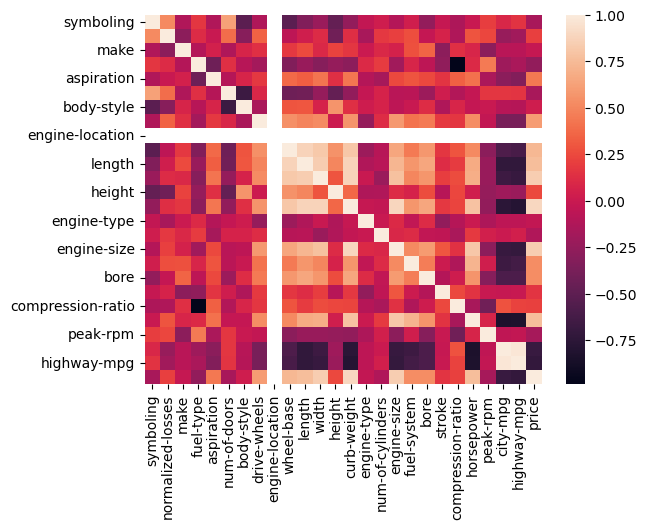

In [36]:
correlation = num_val.corr()
display(correlation)
sns.heatmap(correlation)